## House Rent Prediction Using Linear Regression

### Objective

Build a predictive model using Linear Regression to estimate house rent based on features
from the provided dataset. This project helps understand data preprocessing, EDA,
regression modeling, evaluation metrics, and visualization.


### About
The dataset contains 4700+ listings of rental properties across India, covering a wide
spectrum from huts to high-rise apartments. It includes features like size, number of
bedrooms, furnishing status, tenant preferences, locality, and more


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Load the dataset

In [2]:
data=pd.read_csv("House_Rent_Dataset.csv")
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
data.shape

(4746, 12)

In [4]:
data['Posted On'] = pd.to_datetime(data['Posted On'])

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


No null value is present in the dataset


4 Numerical columns: ['BHK', 'Rent', 'Size', 'Bathroom']

8 Non-numerical columns: ['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

In [6]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Posted On,4746,2022-06-07 18:01:40.126422272,2022-04-13 00:00:00,2022-05-20 00:00:00,2022-06-10 00:00:00,2022-06-28 00:00:00,2022-07-11 00:00:00,NaN
BHK,4746.0,2.08386,1.0,2.0,2.0,3.0,6.0,0.832256
Rent,4746.0,34993.451327,1200.0,10000.0,16000.0,33000.0,3500000.0,78106.412937
Size,4746.0,967.490729,10.0,550.0,850.0,1200.0,8000.0,634.202328
Bathroom,4746.0,1.965866,1.0,1.0,2.0,2.0,10.0,0.884532


Rent is right Skewed

In [7]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

No Duplicate rows are present

In [8]:
# unique values in each column
unique_values=data.nunique()
print(unique_values)

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64


In [11]:

print(data['Floor'].value_counts())



Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
6 out of 29          1
28 out of 31         1
23 out of 30         1
4 out of 30          1
13 out of 25         1
Name: count, Length: 480, dtype: int64


In [12]:
print(data['Area Type'].value_counts() ) 


Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64


In [13]:
print(data['City'].value_counts())


City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64


In [14]:
print(data['Furnishing Status'].value_counts())


Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64


In [15]:
print(data['Tenant Preferred'].value_counts())


Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64


### EDA

In [17]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

No null value

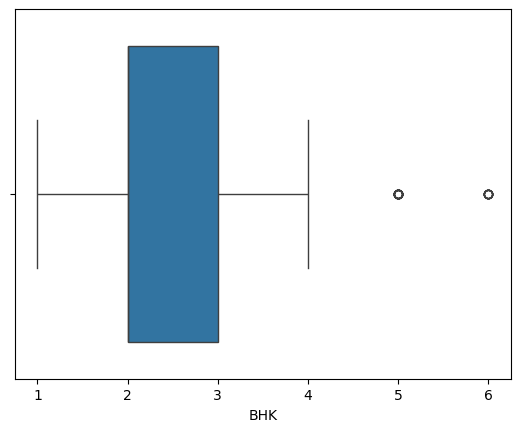

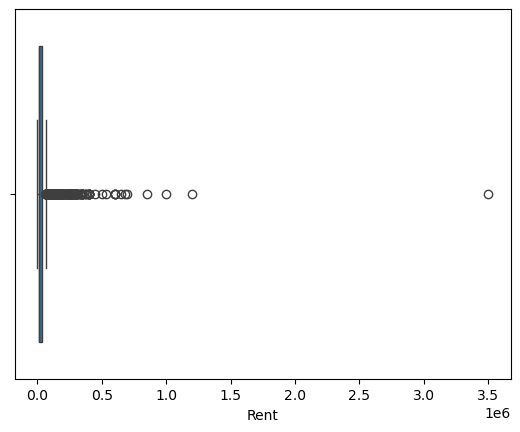

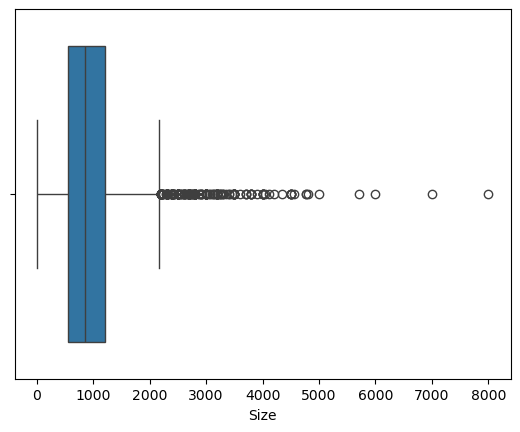

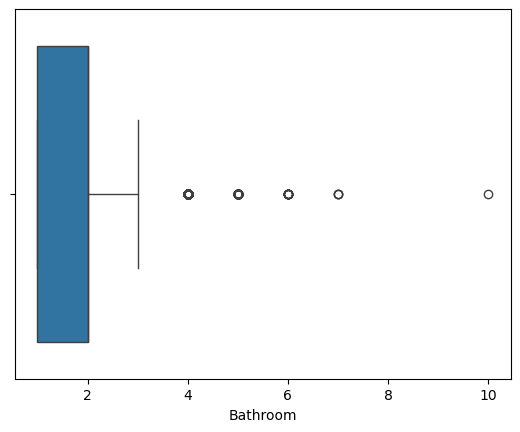

In [9]:
# univariate analysis
cols=['BHK', 'Rent', 'Size', 'Bathroom']
for col in cols:
    sns.boxplot(x=data[col])
    plt.xlabel(col)
    plt.show()


Most of the houses are 2 BHK but there are few expensive 5-6 BHK houses 

Most of the houses have affordable rent but some have extreme high rent 

Most of the houses have are small to mid sized but there are a lot of big properties as well

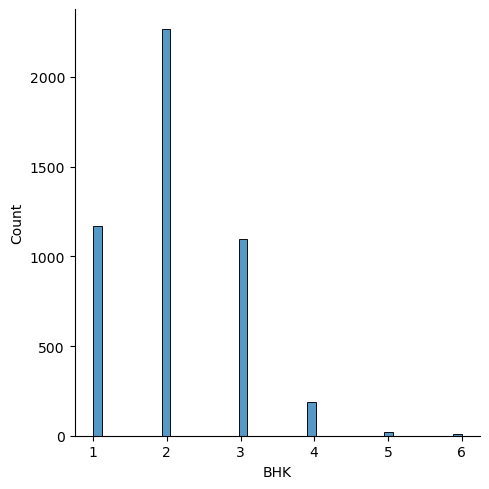

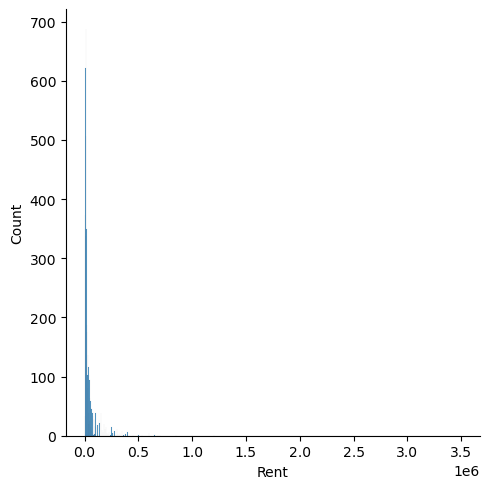

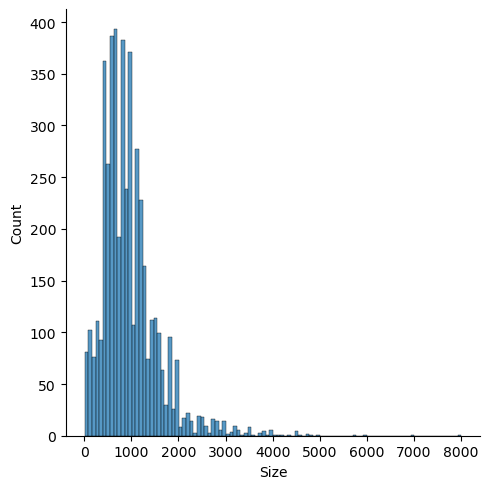

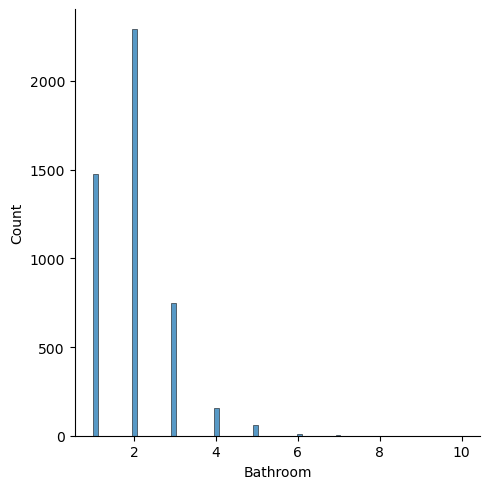

In [18]:
cols=['BHK', 'Rent', 'Size', 'Bathroom']
for col in cols:
    sns.displot(x=data[col])
    plt.xlabel(col)
    plt.show()

size and rent have right skewness

### Bivariate Analysis

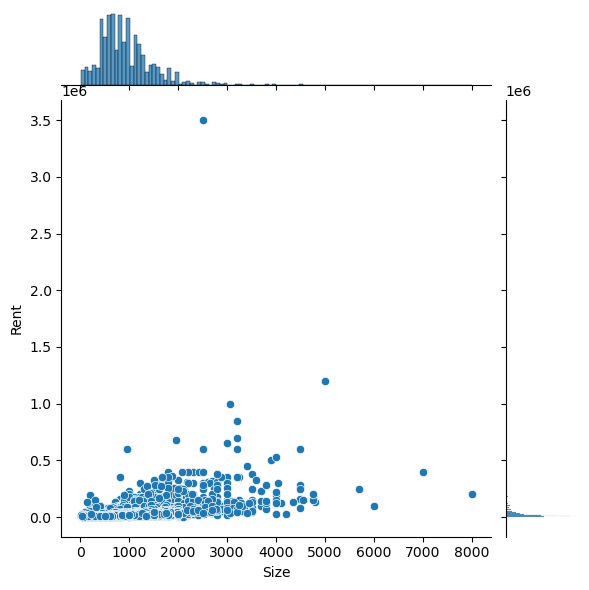

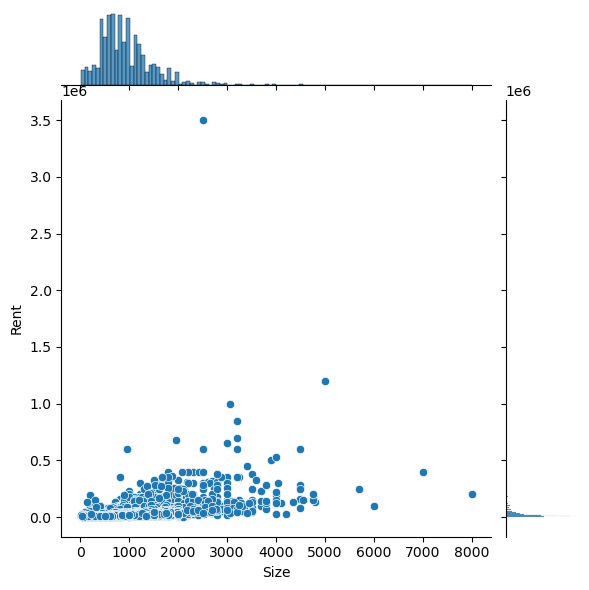

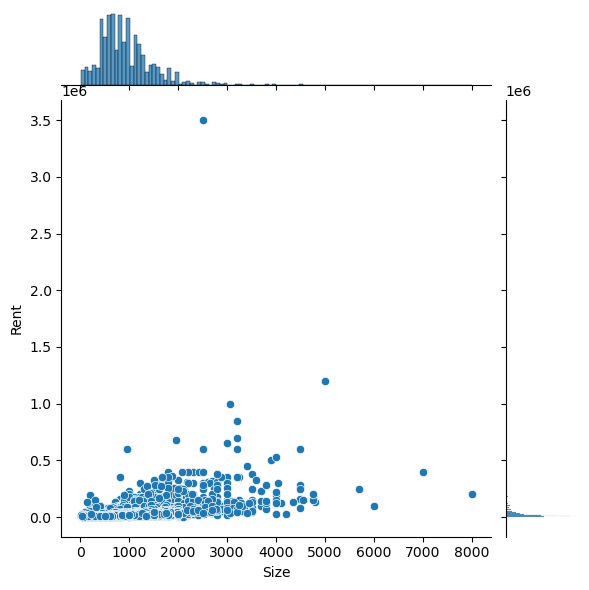

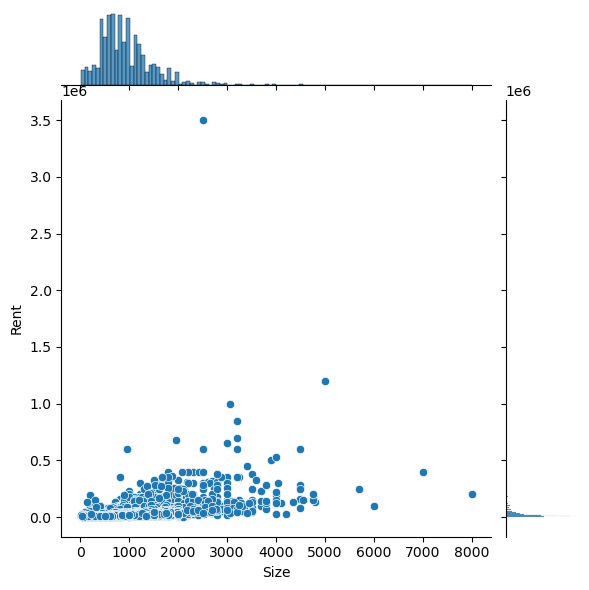

In [23]:
sns.jointplot(data,x='Size', y='Rent')
plt.show()

Relationship between features and target variable

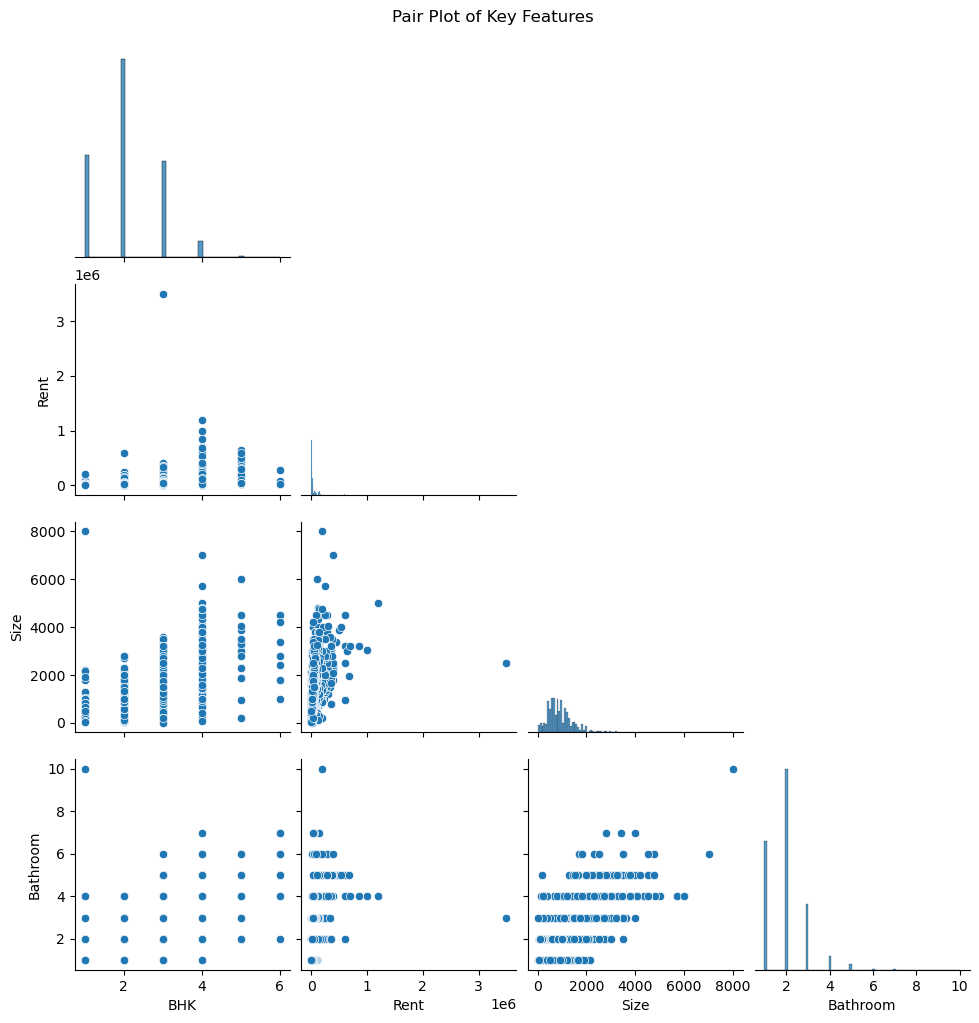

In [38]:
key_features = ['BHK', 'Rent', 'Size', 'Bathroom','Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred','Floor','Area Type']

#  pair plot
sns.pairplot(data[key_features], corner=True)
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()


### Preprocessing

Coversion of Categorical features 


standardization of numerical features

### Model Building

In [24]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [29]:
data_1=data[['BHK', 'Rent', 'Size', 'Bathroom','Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred','Floor','Area Type']]
data_1.head()

,BHK,Rent,Size,Bathroom,Area Locality,City,Furnishing Status,Tenant Preferred,Floor,Area Type
0,2,10000,1100,2,Bandel,Kolkata,Unfurnished,Bachelors/Family,Ground out of 2,Super Area
1,2,20000,800,1,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1 out of 3,Super Area
2,2,17000,1000,1,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1 out of 3,Super Area
3,2,10000,800,1,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1 out of 2,Super Area
4,2,7500,850,1,South Dum Dum,Kolkata,Unfurnished,Bachelors,1 out of 2,Carpet Area


In [31]:
y=data_1['Rent'] # target variable
X=data_1.drop(columns=['Rent']) # independent variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Train-Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
